In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Alleen train inladen
train_path = "../../data/data_train.csv" 
df = pd.read_csv(train_path, sep=",", decimal=".")
df['Seconds_Per_Call'] = df['Seconds of Use'] / df['Frequency of use']
df['SMS_per_Call'] = df['Frequency of SMS'] / df['Frequency of use']
df['Total_Activity'] = df['Frequency of use'] + df['Frequency of SMS']
df['Unique_Number_Ratio'] = df['Distinct Called Numbers'] / df['Frequency of use']
df['Usage_per_month'] = df['Seconds of Use'] / df['Subscription Length']
df['Complaints_per_Activity'] = df['Complaints'] / df['Total_Activity']


df.head()

,Call Failure,Complaints,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Churn,Seconds_Per_Call,SMS_per_Call,Total_Activity,Unique_Number_Ratio,Usage_per_month,Complaints_per_Activity
0,1,0,39,2970,29,487,11,3,30,0,102.413793,16.793103,516,0.379310,76.153846,0.0
1,5,0,20,1755,29,33,16,2,25,0,60.517241,1.137931,62,0.551724,87.750000,0.0
2,0,0,38,990,20,32,15,2,25,0,49.500000,1.600000,52,0.750000,26.052632,0.0
3,24,0,29,16370,242,14,93,2,25,0,67.644628,0.057851,256,0.384298,564.482759,0.0
4,9,0,40,4075,67,7,4,3,30,0,60.820896,0.104478,74,0.059701,101.875000,0.0


In [84]:
import plotly.express as px

# Percentage churn
churn_pct = df["Churn"].value_counts(normalize=True).reset_index()
churn_pct.columns = ["Churn", "Percentage"]
churn_pct['Churn_label'] = churn_pct['Churn'].map({0: 'Gebleven', 1: 'Opgezegd'})

# Professionele kleuren
colors = {"Gebleven": "#1f77b4",  # donkerblauw
          "Opgezegd": "#d62728"}  # donkerrood

fig = px.pie(
    churn_pct,
    names='Churn_label',  
    values='Percentage',
    title='Percentage Customer Churn',
    color='Churn_label',
    color_discrete_map=colors,
    hole=0.3,
    width=700,
    height=400,
)

# Layout aanpassen voor strakker uiterlijk
fig.update_traces(textinfo='percent', pull=[0, 0.1])  # labels + percentage, kleine pull voor highlight
fig.update_layout(template='simple_white', title_font_size=20)

fig.show()


In [140]:
import plotly.graph_objects as go

# Zelfgemaakte features highlighten
new_features = ["Seconds_Per_Call", "SMS_per_Call", "Total_Activity", 
                "Unique_Number_Ratio", "Usage_per_month", "Complaints_per_Activity"]

# Correlatie
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr().round(2)
churn_corr = corr['Churn'].drop('Churn').sort_values(ascending=False)

# Feature beschrijvingen (hover info)
feature_desc = {
    "Call Failures": "Aantal mislukte belpogingen",
    "Complaints": "Heeft klant een klacht ingediend? (0=nee, 1=ja)",
    "Subscription Length": "Aantal maanden dat klant een abonnement heeft",
    "Seconds of Use": "Totale beltijd in seconden",
    "Frequency of use": "Totaal aantal telefoongesprekken",
    "Frequency of SMS": "Totaal aantal verstuurde SMS",
    "Distinct called numbers": "Aantal unieke telefoonnummers waarnaar gebeld is",
    "Age Group": "Leeftijdsgroep (1=jong, 5=oud)",
    "Age": "Leeftijd in jaren",
    # Zelfgemaakte features
    "Seconds_Per_Call": "Gemiddeld aantal seconden per belpoging",
    "SMS_per_Call": "Gemiddeld aantal SMS per belpoging",
    "Total_Activity": "Aantal calls + SMS",
    "Unique_Number_Ratio": "Aantal unieke nummers / totaal calls",
    "Usage_per_month": "Totale seconds of use / abonnement maanden",
    "Complaints_per_Activity": "Aantal klachten / totale activiteit"
}

# Kleuren per bar
colors = ["#d62728" if f in new_features else "#1f77b4" for f in churn_corr.index]

# Drempel voor inside/outside tekst
threshold = 0.13
textpositions = ['inside' if abs(v) >= threshold else 'outside' for v in churn_corr.values]
textcolors = ['white' if abs(v) >= threshold else 'black' for v in churn_corr.values]

# Hover tekst opbouwen
hover_texts = [f"{f}: {feature_desc.get(f, '')}<br>Correlatie: {round(v,2)}" 
               for f, v in zip(churn_corr.index, churn_corr.values)]

# Hoofdtrace
fig = go.Figure(go.Bar(
    x=churn_corr.index,
    y=churn_corr.values,
    marker_color=colors,
    text=[round(v,2) for v in churn_corr.values],
    textposition=textpositions,
    textfont_color=textcolors,
    hovertext=hover_texts,
    hoverinfo="text",
    showlegend=False
))

# Voeg legend toe
fig.add_trace(go.Bar(x=[None], y=[None], marker_color="#1f77b4", name="Originele features"))
fig.add_trace(go.Bar(x=[None], y=[None], marker_color="#d62728", name="Zelfgemaakte features"))

# Layout
fig.update_layout(
    title="Correlatie met Churn",
    template='simple_white',
    width=1250,
    height=400,
    yaxis_title="Correlatie",
    xaxis_title="Feature"
)

fig.show()


<Axes: ylabel='Frequency'>

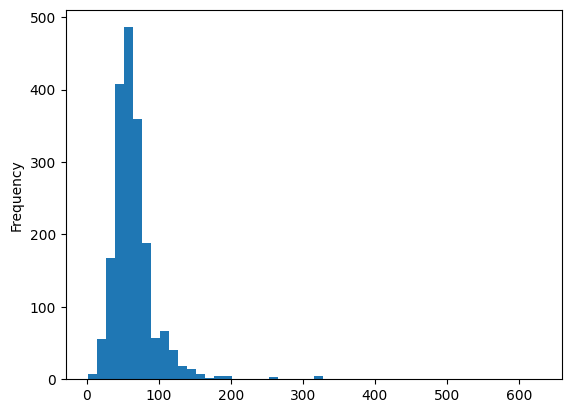

In [76]:
df['duur_per_call'].plot(kind='hist', bins=50)

In [4]:
# Onderzoek de data

print("Shape:", df.shape)
display(df.info()) 


Shape: (1995, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Call Failure             1995 non-null   int64
 1   Complaints               1995 non-null   int64
 2   Subscription Length      1995 non-null   int64
 3   Seconds of Use           1995 non-null   int64
 4   Frequency of use         1995 non-null   int64
 5   Frequency of SMS         1995 non-null   int64
 6   Distinct Called Numbers  1995 non-null   int64
 7   Age Group                1995 non-null   int64
 8   Age                      1995 non-null   int64
 9   Churn                    1995 non-null   int64
dtypes: int64(10)
memory usage: 156.0 KB


None

We zien 1995 data entries en 10 variables, ook zien we in de tabel dat er geen missing values zijn

In [5]:
df.agg(["min", "max", "mean", "median"]).T

,min,max,mean,median
Call Failure,0.0,36.0,7.631078,6.0
Complaints,0.0,1.0,0.078195,0.0
Subscription Length,3.0,47.0,32.379950,35.0
Seconds of Use,0.0,16980.0,4462.505764,2960.0
Frequency of use,0.0,254.0,69.116792,53.0
Frequency of SMS,0.0,522.0,73.318296,20.0
Distinct Called Numbers,0.0,97.0,23.567920,21.0
Age Group,1.0,5.0,2.824060,3.0
Age,15.0,55.0,30.994987,30.0
Churn,0.0,1.0,0.167920,0.0


Hier kijken we naar de min max mean en median van alle variabelen om te kijken of er gekke dingen uitspringen, daar lijkt het niet op.
Mogelijk dat Seconds of Use rechts verdeeld is -> een aantal mensen bellen héél veel, mogelijk dat we dit kunnen/moeten transformeren.

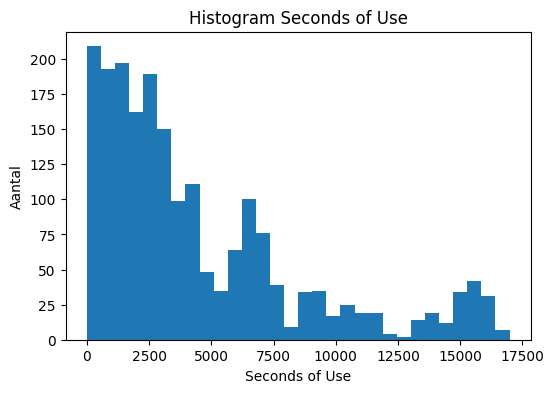

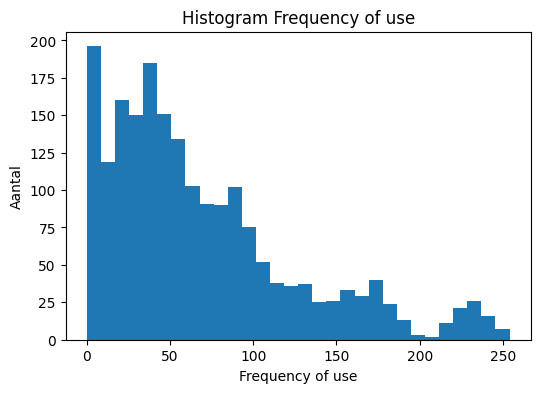

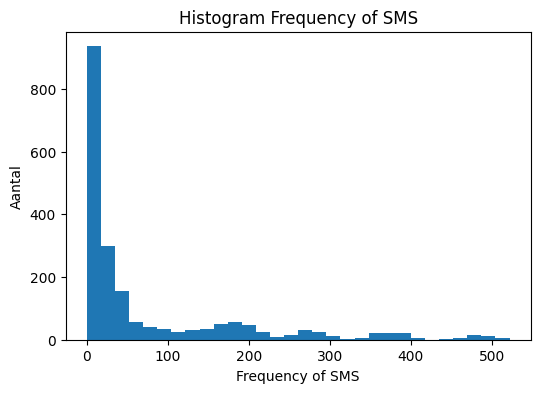

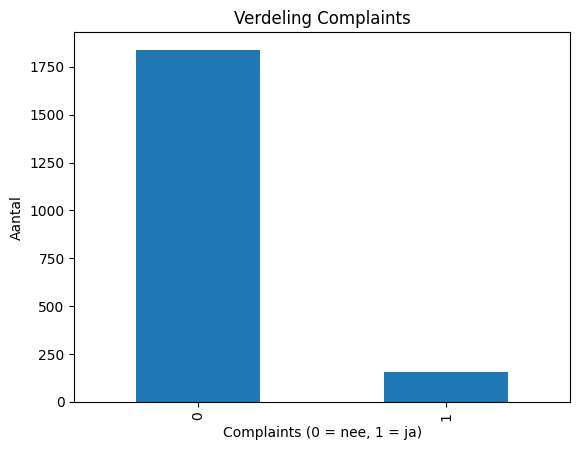

In [6]:
# Nu gaan we een aantal plots (histogrammen) maken om naar de data te kijken
plt.figure(figsize=(6,4))
plt.hist(df["Seconds of Use"], bins=30)
plt.title("Histogram Seconds of Use")
plt.xlabel("Seconds of Use")
plt.ylabel("Aantal")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["Frequency of use"], bins=30)
plt.title("Histogram Frequency of use")
plt.xlabel("Frequency of use")
plt.ylabel("Aantal")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["Frequency of SMS"], bins=30)
plt.title("Histogram Frequency of SMS")
plt.xlabel("Frequency of SMS")
plt.ylabel("Aantal")
plt.show()

df["Complaints"].value_counts().plot(kind="bar")
plt.title("Verdeling Complaints")
plt.xlabel("Complaints (0 = nee, 1 = ja)")
plt.ylabel("Aantal")
plt.show()

#boxplots
# plt.figure(figsize=(6,3))
# df.boxplot(column="Seconds of Use", vert=False)
# plt.title("Boxplot Seconds of Use")
# plt.xlabel("Seconds of Use")
# plt.show()

# plt.figure(figsize=(6,3))
# df.boxplot(column="Frequency of use", vert=False)
# plt.title("Boxplot Frequency of use")
# plt.xlabel("Frequency of use")
# plt.show()

# plt.figure(figsize=(6,3))
# df.boxplot(column="Frequency of SMS", vert=False)
# plt.title("Boxplot Frequency of SMS")
# plt.xlabel("Frequency of SMS")
# plt.show()


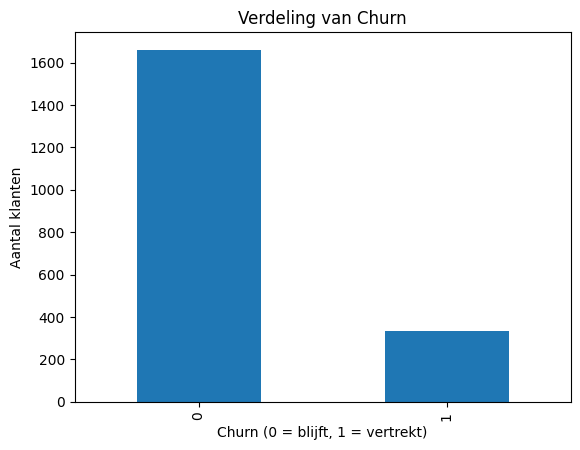

(Churn
 0    1660
 1     335
 Name: count, dtype: int64,
 Churn
 0    0.83208
 1    0.16792
 Name: count, dtype: float64)

In [7]:
# Onderzoek naar de Churn variabele
churn_counts = df["Churn"].value_counts()

plt.figure()
churn_counts.plot(kind="bar")
plt.title("Verdeling van Churn")
plt.xlabel("Churn (0 = blijft, 1 = vertrekt)")
plt.ylabel("Aantal klanten")
plt.show()

churn_counts, churn_counts / len(df)


We zien dat er 1660 klanten blijven en 335 klanten hebben hun abbonement opgezegd, dat is ongeveer 83,2% dat blijft en 16,8% vertrekt.
De dataset is dus overduidelijk ongebalanceerd.
Het is belangrijk dat we juist de vertrekkers juist identificeren.
Dit betekent dat we waarschijnlijk accuracy niet als maatstaf kunnen gebruiken omdat dan het model zal voorspellen dat de klant altijd blijft voor een relatief hoge accuracy.
We moeten kijken naar andere maatstafen die daar wel mee kunnen omgaan, precision, recall, f1-score??

In [8]:
# Verdere verkenning van Churn variabele en mogelijke samenhang met andere variabelen

churn_means = df.groupby("Churn").mean().T
churn_means


Churn,0,1
Call Failure,7.644578,7.564179
Complaints,0.013855,0.397015
Subscription Length,32.486747,31.850746
Seconds of Use,5036.119277,1620.122388
Frequency of use,77.031325,29.898507
Frequency of SMS,84.854819,16.152239
Distinct Called Numbers,25.784940,12.582090
Age Group,2.830120,2.794030
Age,31.048193,30.731343


Hier zien we een tabel waarin we de gemiddeldes van andere variabelen vergelijken van blijvers en afzeggers

In [9]:
# Hier gaan we de gemiddeldes van elkaar aftrekken zodat we mogelijke verbanden kunnen zien

(churn_means[0] - churn_means[1]).sort_values(ascending=False) # Hier trekken we het gemiddelde van de vertrekkers af van de blijvers
# Een positief getal betekent dus dat de blijvers ... meer dan de vertrekkers
# Dus de blijvers bellen 3415 meer seconden dan de vertrekkers

Seconds of Use             3415.996889
Frequency of SMS             68.702580
Frequency of use             47.132818
Distinct Called Numbers      13.202850
Subscription Length           0.636001
Age                           0.316849
Call Failure                  0.080399
Age Group                     0.036091
Complaints                   -0.383160
dtype: float64

We zien hier dat bij bijna alle variabele de blijvers hogere getallen hebben. De blijvers bellen meer, sms'en meer etc.
De enige variabele waar de vertrekkende hogere aantallen hebben is de Complaint variabele. 

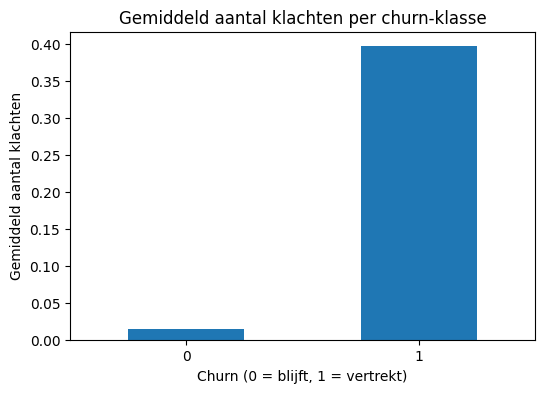

In [10]:
# Plot Churn en Complaints

plt.figure(figsize=(6,4))
df.groupby("Churn")["Complaints"].mean().plot(kind="bar")

plt.title("Gemiddeld aantal klachten per churn-klasse")
plt.xlabel("Churn (0 = blijft, 1 = vertrekt)")
plt.ylabel("Gemiddeld aantal klachten")
plt.xticks(rotation=0)
plt.show()